In [1]:
import pandas as pd
import phate
import scprep
import scanpy as sc
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist
# matplotlib settings for Jupyter notebooks only
%matplotlib inline
DATA_PATH = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/sea_ad/data/'

In [2]:
adata = sc.read_h5ad(DATA_PATH + 'SEAAD_MTG_RNAseq_subset_2000cellsperbraak_PREPROCESSED.h5ad')

In [6]:
adata.obs['Class'][adata.obs['Subclass'] == 'Microglia-PVM']

exp_component_name
CTTCCGAGTGGTACAG-L8TX_210506_01_A09-1153814215    Non-neuronal and Non-neural
TTGTGGACACGGGTAA-L8TX_210521_01_C05-1142430441    Non-neuronal and Non-neural
GATTGGTCAAGAGTGC-L8TX_210701_01_H06-1153814265    Non-neuronal and Non-neural
GCCAGCACAGCATACT-L8TX_210318_01_B05-1153814162    Non-neuronal and Non-neural
AAGGTATAGGCTCATG-L8XR_210715_01_A12-1121939868    Non-neuronal and Non-neural
                                                             ...             
CTCAGTCAGATGGGCT-L8TX_210506_01_G08-1142430427    Non-neuronal and Non-neural
AGTAGCTAGCTTTGTG-L8TX_210506_01_G08-1142430427    Non-neuronal and Non-neural
AACACACTCATGTCAG-L8TX_210318_01_D04-1142430386    Non-neuronal and Non-neural
TCCCACAAGACTCGAG-L8TX_210429_01_D03-1142430416    Non-neuronal and Non-neural
CTGCGAGTCTTAGCAG-L8TX_210415_01_F11-1142430401    Non-neuronal and Non-neural
Name: Class, Length: 401, dtype: category
Categories (3, object): ['Neuronal: GABAergic', 'Neuronal: Glutamatergic', 'Non-n

In [9]:
adata.obs['Class'][adata.obs['Subclass'] == 'Astrocyte']


exp_component_name
TACTTGTAGGGTTAGC-L8TX_210318_01_D05-1142430392    Non-neuronal and Non-neural
ACGATGTAGAATTGTG-L8TX_210722_01_B07-1153814297    Non-neuronal and Non-neural
CTGGACGGTGTTGCCG-L8TX_210429_01_C03-1142430411    Non-neuronal and Non-neural
CCTACGTGTGACAACG-L8TX_210701_01_E07-1153814263    Non-neuronal and Non-neural
GCGATCGCAGGATCTT-L8TX_201023_01_F08-1142430227    Non-neuronal and Non-neural
                                                             ...             
TAATCACCAGCTAATT-L8XR_211007_02_G03-1135704088    Non-neuronal and Non-neural
GCGATCGTCATCGCTC-L8TX_210415_01_F11-1142430401    Non-neuronal and Non-neural
GTGGTTACATAAGCAA-L8TX_210506_01_G08-1142430427    Non-neuronal and Non-neural
AGTAGCTTCGCGTTTC-L8TX_210415_01_F11-1142430401    Non-neuronal and Non-neural
ACATTTCGTCATATGC-L8TX_210506_01_G08-1142430427    Non-neuronal and Non-neural
Name: Class, Length: 710, dtype: category
Categories (3, object): ['Neuronal: GABAergic', 'Neuronal: Glutamatergic', 'Non-n

In [10]:
adata.obs['Class'].value_counts()

Class
Neuronal: Glutamatergic        7706
Neuronal: GABAergic            3785
Non-neuronal and Non-neural    2509
Name: count, dtype: int64

In [12]:
# np.random.seed(42)
# subset_id = np.random.choice(adata.shape[0], size=5000, replace=False)
adata = adata[adata.obs['Class'] == 'Neuronal: GABAergic']

In [13]:
phate_operator = phate.PHATE()
Y_phate = phate_operator.fit_transform(adata[:, adata.var['highly_variable']])

Calculating PHATE...
  Running PHATE on 3785 observations and 3515 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.97 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 3.97 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.26 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.32 seconds.
  Calculated landmark operator in 5.62 seconds.
  Calculating optimal t...
    Automatically selected t = 53
  Calculated optimal t in 2.98 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.97 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.12 seconds.
Calculated PHATE in 19.88 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

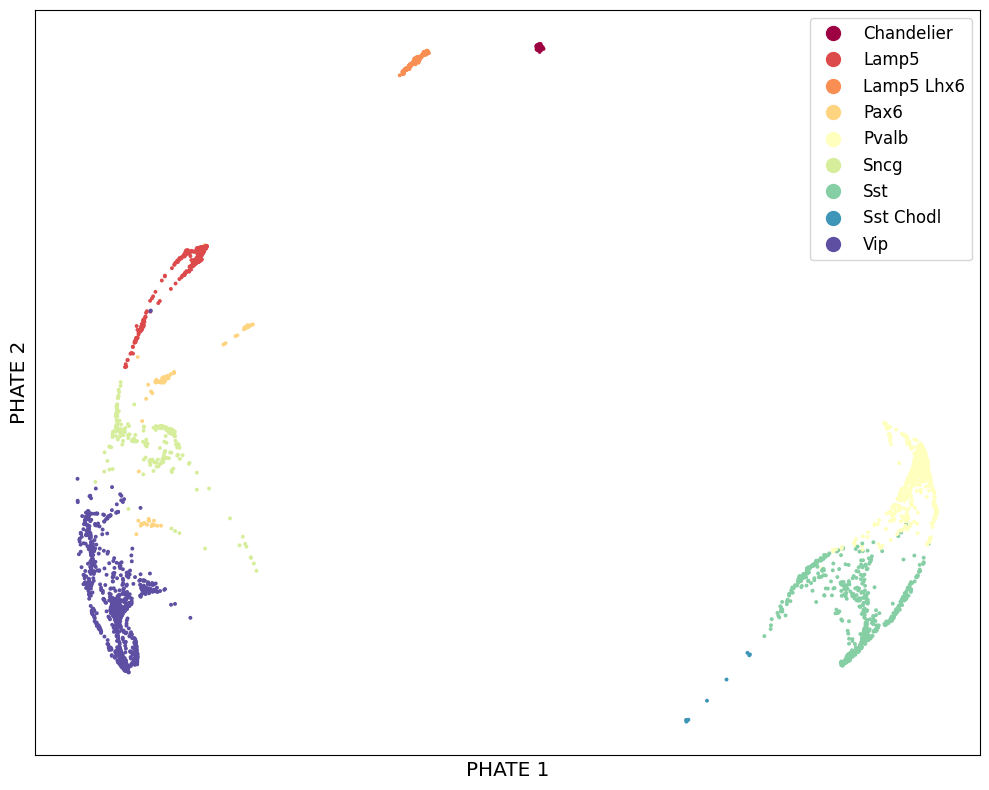

In [14]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),c=adata.obs['Subclass'], cmap='Spectral',
                      ticks=False, label_prefix="PHATE ")

In [15]:
pca_loadings = phate_operator.graph.data_nu
pca_components = phate_operator.graph.data_pca.components_

In [16]:
phate_operator = phate.PHATE()
Y_phate = phate_operator.fit_transform(pca_loadings)

Calculating PHATE...
  Running PHATE on 3785 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 2.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 2.05 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.26 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.52 seconds.
  Calculated landmark operator in 4.99 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 3.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.67 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.20 seconds.
Calculated PHATE in 16.25 seconds.


In [17]:
colors = adata.obs['Subclass'].cat.codes.to_numpy().flatten()

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='PHATE 1', ylabel='PHATE 2'>

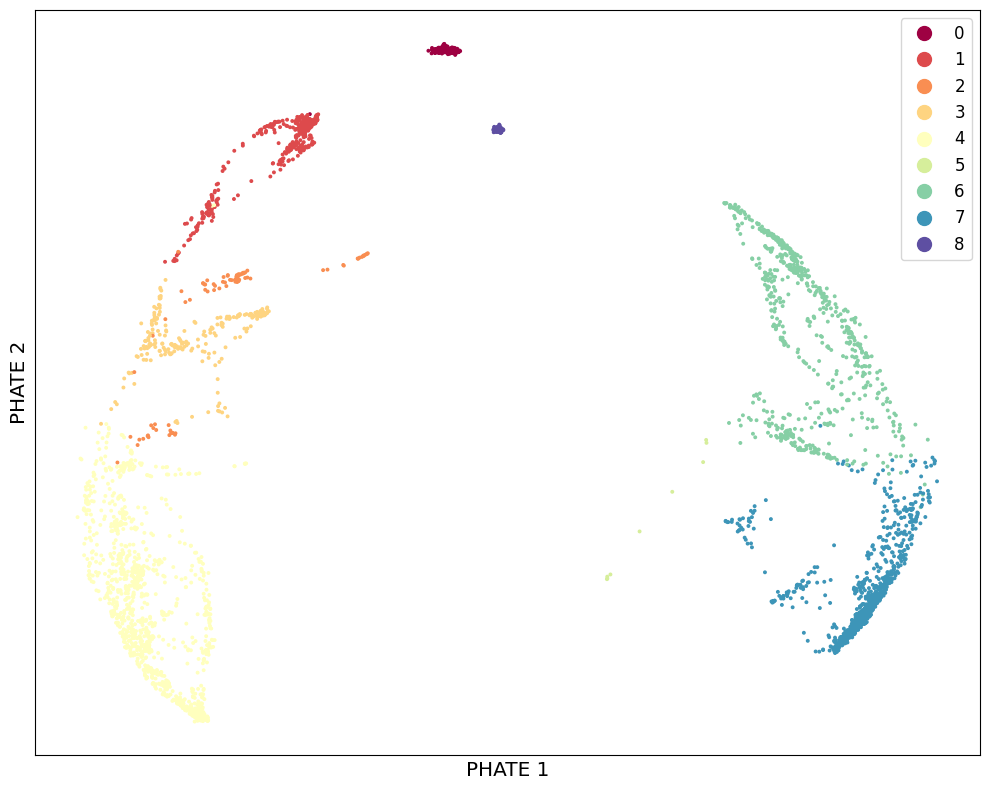

In [18]:
scprep.plot.scatter2d(Y_phate, figsize=(10,8),c=colors, cmap='Spectral',
                      ticks=False, label_prefix="PHATE ")

In [19]:
X_dist = squareform(pdist(phate_operator.diff_potential))

In [ ]:
# np.save("../data/sea_ad_rnaseq_phate.npy", Y_phate)

In [ ]:
# np.save("../data/sea_ad_rnaseq_pca.npy", pca_loadings)

In [ ]:
# np.save("../data/sea_ad_rnaseq_pca_components.npy", pca_components)

In [ ]:
# adata.obs['Subclass'].to_csv("../data/sea_ad_rnaseq_celltypes.csv")

In [20]:
np.savez(
    '../data/sea_ad_gaba.npz', 
    data=pca_loadings, 
    phate=Y_phate, 
    dist=X_dist, 
    colors=colors
)

In [21]:
from heatgeo.embedding import HeatGeo

In [22]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(pca_loadings)

Using s_gd2 for MDS. None


In [23]:
emb_op.metric_computation(pca_loadings)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

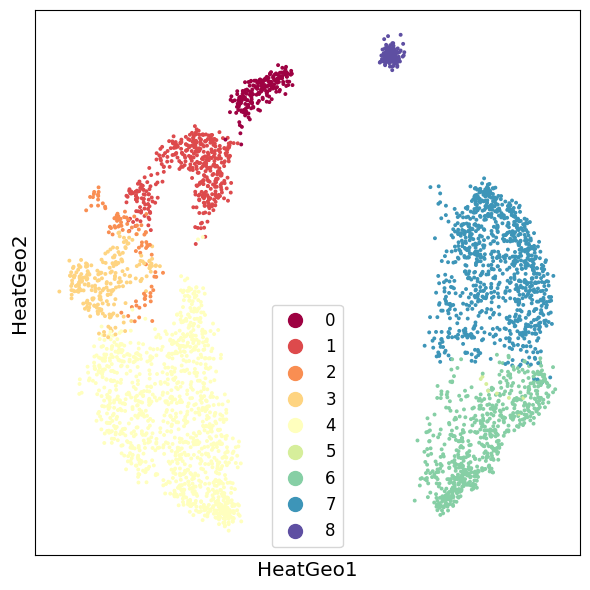

In [24]:
scprep.plot.scatter2d(emb, c=colors, figsize=(6, 6), cmap="Spectral", ticks=False, label_prefix="HeatGeo")

In [25]:
np.savez(
    '../data/sea_ad_gaba_heatgeo.npz', 
    data=pca_loadings, 
    phate=emb, 
    dist=emb_op.dist, 
    colors=colors
)